# Introduction to OpenCV  

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It is used in image processing and other computer vision tasks. We will learn the basics of OpenCV today followed by a fun project. 

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h4>Reading and Displaying an image</h4>

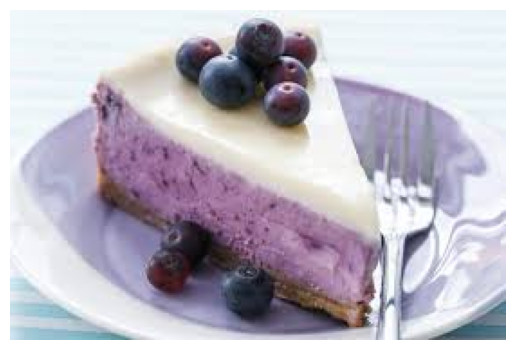

In [5]:
# Read an image from file
img = cv2.imread('images/food.jpeg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [6]:
# Image as matrix of pixels
print("Image array")
print(img)

# Access pixel values
pixel_value = img[100, 50]  # Get pixel value at (50, 100)
print('Pixel Value:', pixel_value)
img = np.array(img)
print("Shape of image is", img.shape)

Image array
[[[251 248 240]
  [251 248 240]
  [251 248 240]
  ...
  [247 242 233]
  [247 242 233]
  [247 242 233]]

 [[251 248 240]
  [251 248 240]
  [251 248 240]
  ...
  [248 243 234]
  [248 243 234]
  [248 243 234]]

 [[251 248 240]
  [251 248 240]
  [251 248 240]
  ...
  [248 243 234]
  [248 243 234]
  [248 243 234]]

 ...

 [[244 230 208]
  [242 228 206]
  [239 225 202]
  ...
  [132 118  90]
  [132 118  89]
  [132 118  90]]

 [[243 229 207]
  [241 227 205]
  [238 224 201]
  ...
  [133 120  98]
  [133 121  97]
  [133 120  98]]

 [[241 227 205]
  [240 226 204]
  [236 222 199]
  ...
  [153 140 124]
  [153 141 123]
  [154 141 125]]]
Pixel Value: [ 83  76 113]
Shape of image is (183, 275, 3)


<h4> Convert to Gray Scale </h4>

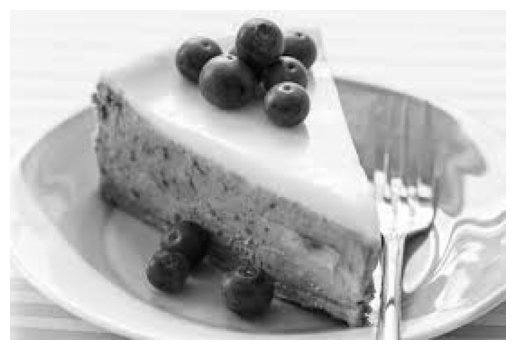

In [11]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h4> Resize an image </h4>

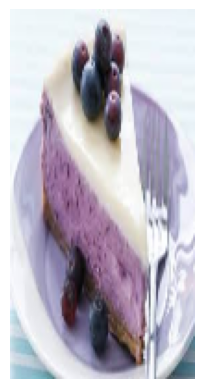

In [12]:
# Resize the image
resized_img = cv2.resize(img, (100, 200))

# Display the image
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h4> Crop an image </h4>

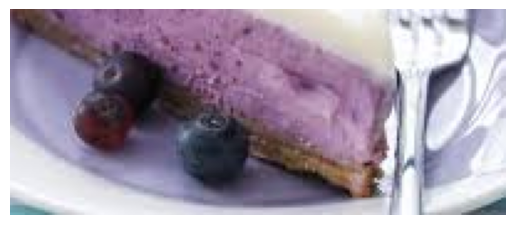

In [13]:
# Crop a region of interest
roi = img[100:300, 50:250]

# Display the image
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h4> Blurring an image </h4>

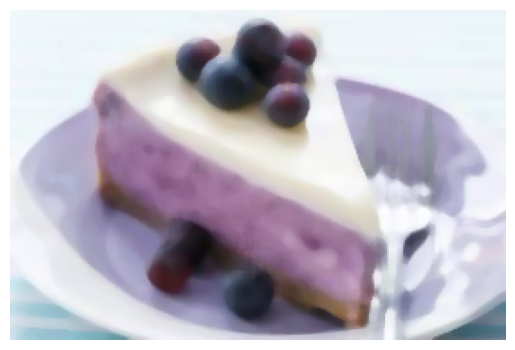

In [7]:
# Apply Median blur
blurred_img = cv2.medianBlur(img, 7, 0)    # image, kernel-size

# Display the image
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h3> Arithmetic operations on images </h3>

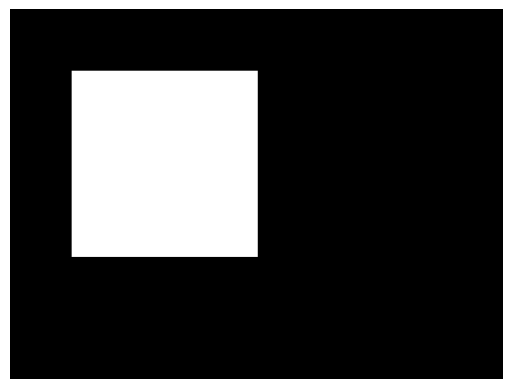

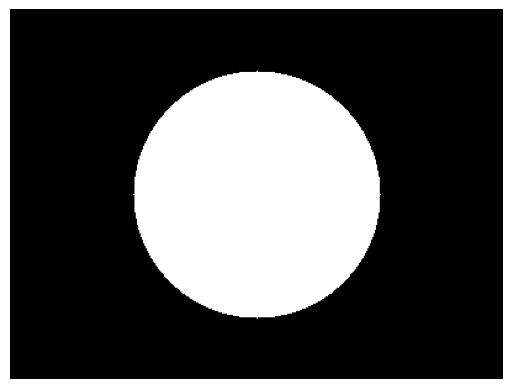

In [19]:
# Create two binary images (black and white) for demonstration
image1 = np.zeros((300, 400), dtype=np.uint8)
image2 = np.zeros((300, 400), dtype=np.uint8)

# Define regions in the images
cv2.rectangle(image1, (50, 50), (200, 200), 255, -1)    # White rectangle in image1
cv2.circle(image2, (200, 150), 100, 255, -1)            # White circle in image2

plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

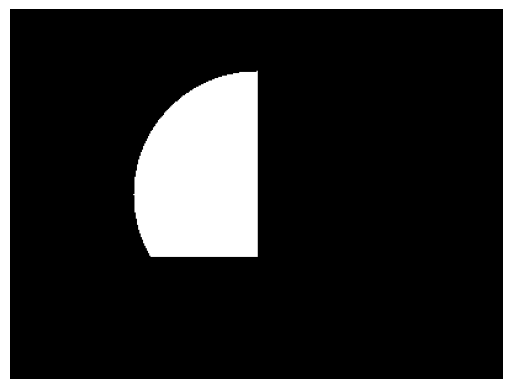

In [18]:
# Bitwise AND operation
bitwise_and = cv2.bitwise_and(image1, image2)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_and, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

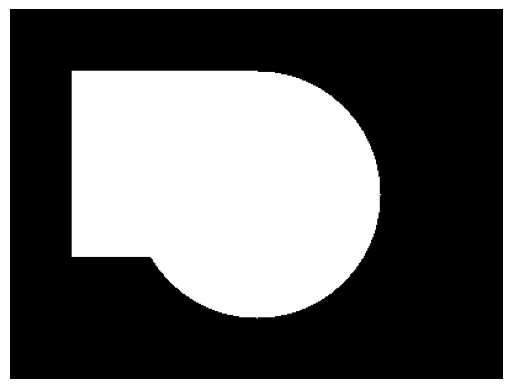

In [9]:
# Bitwise OR operation
bitwise_or = cv2.bitwise_or(image1, image2)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_or, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

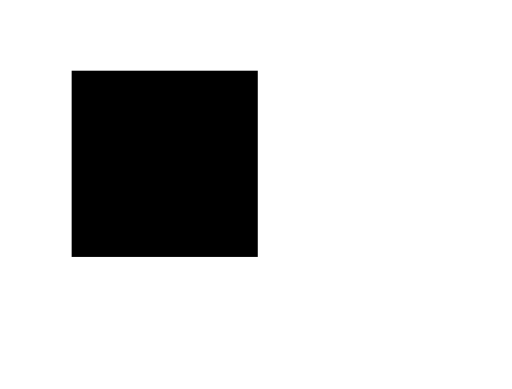

In [20]:
# Bitwise NOT operation
bitwise_not_image1 = cv2.bitwise_not(image1)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_not_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

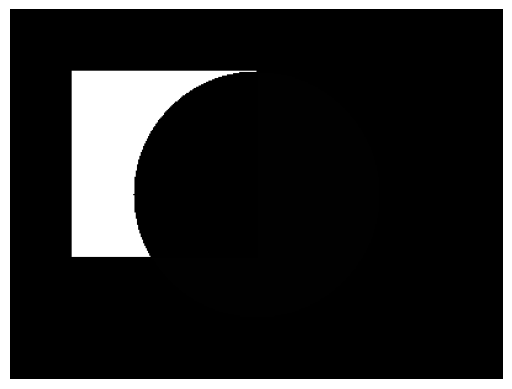

In [21]:
subtraction = image1 - image2

# Display the image
plt.imshow(cv2.cvtColor(subtraction, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


<h1>Stepwise demonstartion</h1>

<h5>Imagine the cake image is the background and the circle in blue is a person,
and the circle in yellow is the cloak, we want to make the person invisible by replacing the cloak with the backround</h5>

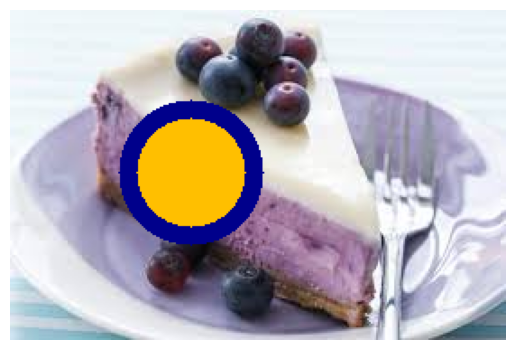

In [24]:
base_img =  cv2.imread('images/food.jpeg')
cloak_img = base_img.copy()
cloak_img_rgb = cv2.cvtColor(cloak_img, cv2.COLOR_BGR2RGB)
base_img_rgb =  cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

cv2.circle(cloak_img_rgb, (100,90), 40, (0, 0, 139), -1)
cv2.circle(cloak_img_rgb, (100,90), 30, (255, 191, 0), -1) # RGB
plt.imshow(cloak_img_rgb)
plt.axis('off')
plt.show()

<h5>Creating the mask for the yellow cloak</h5>

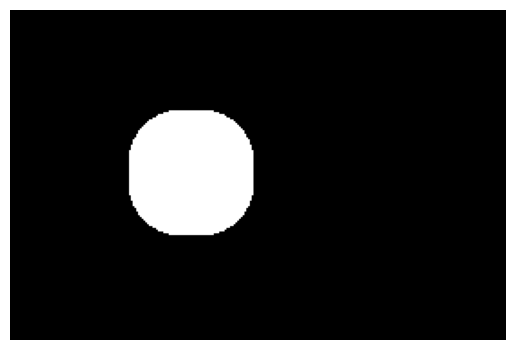

In [25]:
def create_mask(frame, lower_hsv, upper_hsv, kernel_size=3):
	inspect = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
	mask = cv2.inRange(inspect, lower_hsv, upper_hsv)
	mask = cv2.medianBlur(mask, 3)
	kernel = np.ones((kernel_size, kernel_size), np.uint8)
	mask = cv2.dilate(mask, kernel, iterations=5)

	return mask


lower_hsv = np.array([20, 100, 100])
upper_hsv = np.array([50, 255, 255])

mask = create_mask(cloak_img_rgb, lower_hsv, upper_hsv)
plt.imshow(mask, cmap="gray")
plt.axis('off')
plt.show()

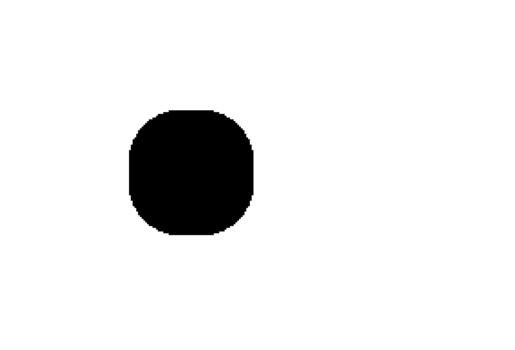

In [26]:
mask_inv = 255 - mask
plt.imshow(mask_inv, cmap="gray")
plt.axis('off')
plt.show()

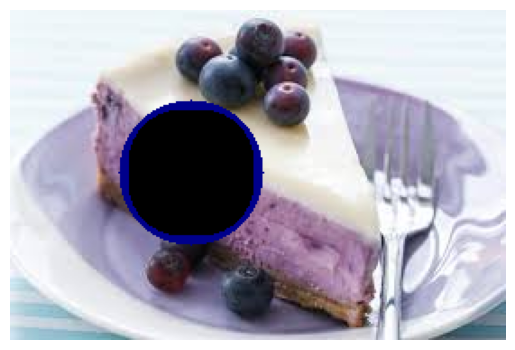

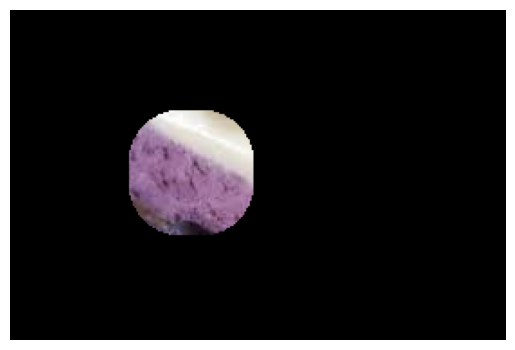

In [27]:
frame_inv_rgb = cv2.bitwise_and(cloak_img_rgb, cloak_img_rgb, mask=mask_inv)
plt.imshow(frame_inv_rgb)
plt.axis('off')
plt.show()


blanket_area_rgb = cv2.bitwise_and(base_img_rgb, base_img_rgb, mask=mask)
plt.imshow(blanket_area_rgb)
plt.axis('off')
plt.show()

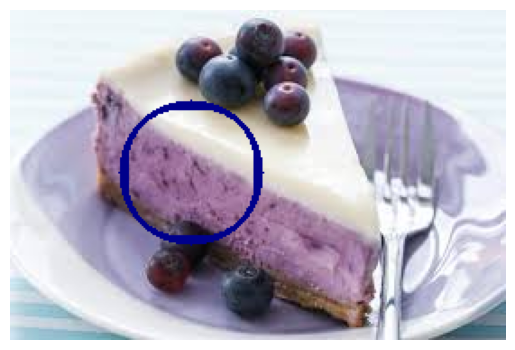

In [28]:
final_rgb = cv2.bitwise_or(frame_inv_rgb, blanket_area_rgb)
plt.imshow(final_rgb)
plt.axis('off')
plt.show()